# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

1.1. Откройте файлы и изучите их.

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
display(data_train.head(3), data_train.info())
display(data_test.head(3), data_test.info())
display(data.head(3), data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


None

Меняю тип данных для столбца 'date':

In [4]:
data_train['date'] = data_train['date'].astype('datetime64[ns]')
data_test['date'] = data_test['date'].astype('datetime64[ns]')
data['date'] = data['date'].astype('datetime64[ns]')

Заполнять пропуски в таргетах я не буду, поэтому просто удалю их:

In [5]:
data_train.dropna(subset=['final.output.recovery', 'rougher.output.recovery'], inplace=True)

<div class="alert alert-block alert-info">
Я не удалял столбцы, я удалил пропуски в них вместо заполнения. А не заполнил их по следующей причине:
    
Т.к. всё это делается для нахождения метрики в конце проекта, то я подумал, что качество модели может зависеть напрямую от двух моментов:
    
1. Это таргеты, ведь именно с ними сравнивается предсказание, и не хотелось бы вносить в них синтетические данные. Неизвестно как бы это сказалось на итоговой метрике, потому, чтобы не сделать хуже я их и удалил.
    
2. Это про вопрос чуть ниже про заполнение соседними значениями. И это касается признаков. Я не стал здесь использовать ffill, т.к. от этих данных зависит качество обучения модели. Да по условию сказано, что можно заполнить соседними, но соседними не по строчке, а по времени. И как можно увидеть ниже, даже отобрав данные за сутки, многие пропуски остались пусты. Тоесть если бы я стал заполнять ffill, то значение могло бы взяться может из предыдущего дня, а может и из предыдущей недели, что уже совершенно не является соседними по времени событиями. И к этому ниже я построил график распределения `final.output.recovery` по датам, и видно, что есть в данных 2 больших перерыва с сентября 2016 по январь 2017 и сентября 2017 по январь 2018. Если пропуск находится где-то рядом с перерывом, то возьмётся значение, отличающееся на 4 месяца.  Поэтому в обучающих данных я не использовал ffill.
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера v_2**
     
Да)Слово столбцы было случайно)
    
Спасибо за развернутый ответ)
</div>

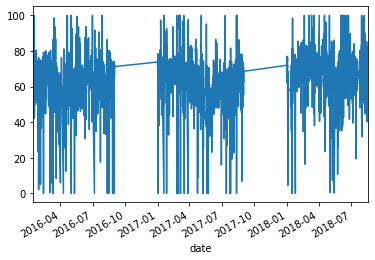

In [6]:
data_train.groupby('date')['final.output.recovery'].median().plot()

Цикл для заполнения пропусков в данных. По условию соседние по времени параметры часто похожи, поэтому группирую по дням (считаю, что сутки оптимальный параметр для группировки) и заполняю пропуски медианными значениями:

In [7]:
for column in data_train.columns[1:]:
    data_train[column] = (
        data_train[column]
        .fillna(data_train
                .groupby([data_train['date'].dt.year.astype(str)
                          + '-' + 
                          data_train['date'].dt.month.astype(str)
                          + '-' + 
                          data_train['date'].dt.day.astype(str)])
                [column].transform('median')))
data_train.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  5
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

Видно, что ещё остались пропуски в данных, это по причине, что данная процедура за сутки произошла всего 1 раз и данные потерялись. Группировать еще раз, но уже по неделе считаю некорректным, так как это уже сложно назвать соседними по времени параметрами. Поэтому удаляю все оставшиеся пропуски:

In [8]:
data_train.dropna(inplace=True)
data_train.reset_index(drop=True, inplace=True)

1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

In [9]:
c = data_train['rougher.output.concentrate_au']
f = data_train['rougher.input.feed_au']
t = data_train['rougher.output.tail_au']
recovery = ((c * (f - t)) / (f * (c - t))) * 100
print("mae : {:.2}".format(mean_absolute_error(data_train['rougher.output.recovery'], recovery)))
print("Среднее для rougher.output.recovery: {0}, среднее для вычисленной эффективности обогащения: {1}".format(data_train['rougher.output.recovery'].mean(), recovery.mean()))

mae : 9.5e-15
Среднее для rougher.output.recovery: 82.64991625710468, среднее для вычисленной эффективности обогащения: 82.64991625710468


На данном этапе я убедился, что эффективность рассчитана верно, ведь mae имеет очень маленькое значение.

1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [10]:
extra_features = data_train.columns[data_train.columns.isin(data_test) == False]
extra_features = extra_features.drop(['rougher.output.recovery', 'final.output.recovery'])
print(extra_features)

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol',
       'final.output.tail_au', 'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.output.tail_ag',
       'rougher.outp

Я обнаружил 32 признака, недоступных в тестовой выборке. Их объединяет то, что данные для этих признаков могут быть получены только после выполнения определённых этапов тех.процесса, проще говоря, эти признаки содержат параметры продукта, а не сырья. Это сделано для того, чтобы приблизить тестовую выборку к реальным данным, ведь потом модель должна будет предсказывать, зная только характеристики сырья.

1.4. Проведите предобработку данных.

Теперь надо добавить столбцы с таргетами в тестовый набор данных из полного набора данных: 

In [11]:
data_test = data_test.merge(data[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date', how='left')

Далее удаляю пропуски из тестового набора данных и заполняю остальные пропуски с помощью `ffill()`

In [12]:
data_test.dropna(subset=['final.output.recovery', 'rougher.output.recovery'], inplace=True)
data_test.reset_index(drop=True, inplace=True)
data_test = data_test.ffill()

# Вывод

В данном этапе я исследовал данные, заполнял пропуски, искал признаки, которые не нужны для обучения модели, проверял правильность рассчетов.

Выяснил, что в данных очень много пропусков, много лишней информации (32 столбца) в обучающей выборке, попробовал 2 разных способа заполнения пропусков в признаках (в обучающих данных с помощью цикла и группировки по дням, в тестовых данных с помощью ffill), также убедился в правильности расчетов с помощью mae.

## Анализ данных

2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

In [13]:
def boxplot(metal_concentration, name_metal):
    data_train[metal_concentration].plot.box(figsize=(15,7))
    plt.title('Концентрация ' + name_metal + ' на разных этапах тех.процесса')
    plt.xlabel('Этапы тех.процесса')
    plt.ylabel('Концентрация ' + name_metal)
    plt.show()
    display(data_train[metal_concentration].describe())

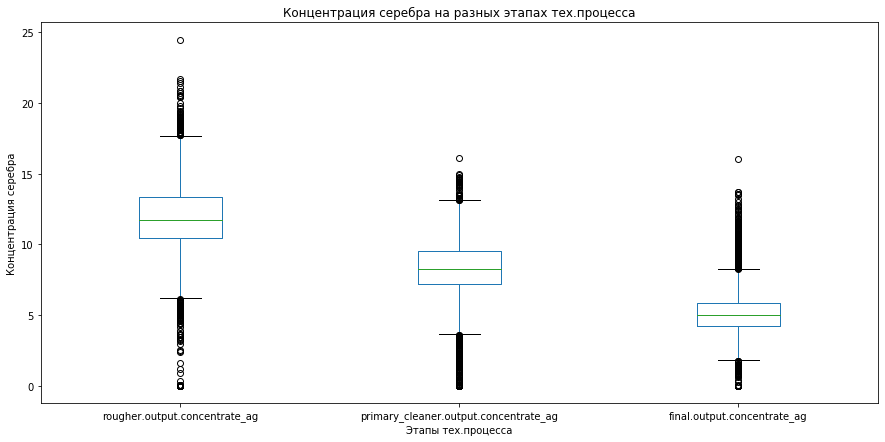

,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
count,12888.000000,12888.000000,12888.000000
mean,11.771381,8.262172,5.147998
std,2.673580,1.981616,1.372871
min,0.000000,0.000000,0.000000
25%,10.453662,7.171974,4.217694
50%,11.696738,8.262715,4.982273
75%,13.346321,9.552751,5.842809
max,24.480271,16.081632,16.001945


In [14]:
boxplot(['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag'], "серебра")

Концентрация серебра равномерно снижается по ходу техпроцесса:

 * после флотации медиана равна 11.69%,
  
 * после первого этапа очистки 8.26%,
  
 * финальные характеристики концентрации 4.98%

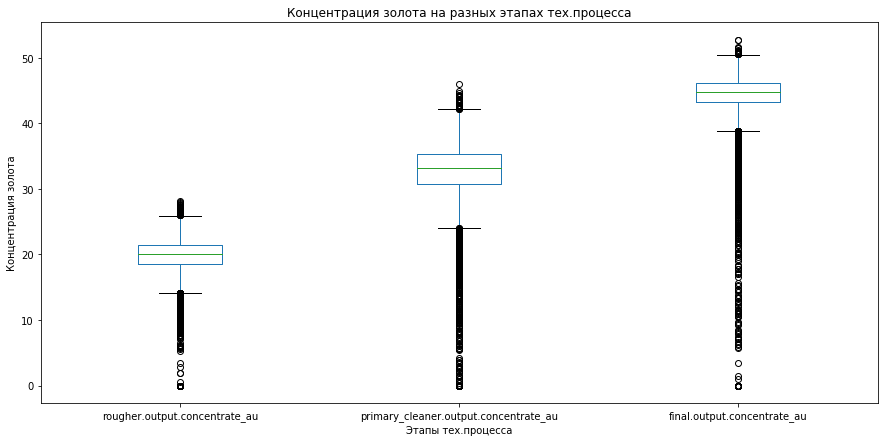

,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
count,12888.000000,12888.000000,12888.000000
mean,19.580129,32.403888,43.993424
std,3.642619,5.680282,4.718753
min,0.000000,0.000000,0.000000
25%,18.555757,30.793491,43.208166
50%,20.067251,33.147229,44.832039
75%,21.507209,35.337438,46.129023
max,28.146838,45.933934,52.756638


In [15]:
boxplot(['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au'], "золота")

Концентрация золота равномерно увеличивается по ходу техпроцесса:

 * после флотации медиана равна 20.06%,
  
 * после первого этапа очистки 33.14%,
    
 * финальные характеристики концентрации 44.83%

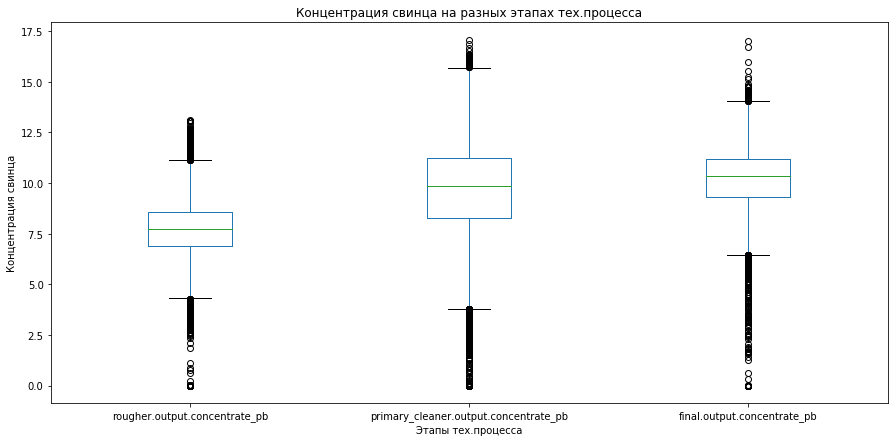

,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
count,12888.000000,12888.000000,12888.000000
mean,7.660259,9.518603,10.161392
std,1.776181,2.657321,1.642582
min,0.000000,0.000000,0.000000
25%,6.873609,8.265118,9.297941
50%,7.740230,9.862967,10.350876
75%,8.584419,11.242163,11.194076
max,13.091679,17.081278,17.031899


In [16]:
boxplot(['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb'], "свинца")

Концентрация свинца увеличивается неравномерно по ходу техпроцесса:

 * после флотации медиана равна 7.74%,
  
 * после первого этапа очистки 9.86%,
    
 * финальные характеристики концентрации 10.35%
  
Видно, что у концентрации всех элементов есть выбросы, стремящиеся к 0, при этом среднее везде очень близко к медиане, это говорит о том, что выбросов немного на фоне всей выборки.

2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

In [17]:
print('95%-й доверительный интервал для гранул после первого этапа очистки в обучающем наборе данных:', st.t.interval(
    .95, 
    len(data_train['primary_cleaner.input.feed_size'])-1, 
    loc=data_train['primary_cleaner.input.feed_size'].mean(), 
    scale=data_train['primary_cleaner.input.feed_size'].sem()))

95%-й доверительный интервал для гранул после первого этапа очистки в обучающем наборе данных: (7.332063789108174, 7.352888237572847)


In [18]:
print('95%-й доверительный интервал для гранул после флотации в обучающем наборе данных:', st.t.interval(
    .95, 
    len(data_train['rougher.input.feed_size'])-1, 
    loc=data_train['rougher.input.feed_size'].mean(), 
    scale=data_train['rougher.input.feed_size'].sem()))

95%-й доверительный интервал для гранул после флотации в обучающем наборе данных: (58.00060061995236, 58.702115076493136)


In [19]:
print('95%-й доверительный интервал для гранул после первого этапа очистки в тестовом наборе данных:', st.t.interval(
    .95, 
    len(data_test['primary_cleaner.input.feed_size'])-1, 
    loc=data_test['primary_cleaner.input.feed_size'].mean(), 
    scale=data_test['primary_cleaner.input.feed_size'].sem()))

95%-й доверительный интервал для гранул после первого этапа очистки в тестовом наборе данных: (7.249891489783315, 7.282786892758497)


In [20]:
print('95%-й доверительный интервал для гранул после флотации в тестовом наборе данных:', st.t.interval(
    .95, 
    len(data_test['rougher.input.feed_size'])-1, 
    loc=data_test['rougher.input.feed_size'].mean(), 
    scale=data_test['rougher.input.feed_size'].sem()))

95%-й доверительный интервал для гранул после флотации в тестовом наборе данных: (55.43846693316008, 56.46704112463018)


Видно, что 95% значений размеров гранул после флотации и после первичной очистки в тестовом наборе данных находятся очень близко к 95% доверительному интервалу обучающей выборки.

Это говорит о том, что распределения одинаковы, но обучающий набор данных имеет чуть большие значения из-за того, что сама выборка почти в 3 раза больше тестовой.

2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии.

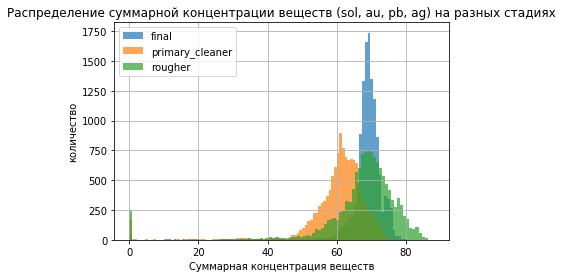

In [21]:
(data_train['final.output.concentrate_sol']
 + data_train['final.output.concentrate_au']
 + data_train['final.output.concentrate_pb']
 + data_train['final.output.concentrate_ag']).hist(bins = 100, alpha=0.7, label='final')

(data_train['primary_cleaner.output.concentrate_sol']
 + data_train['primary_cleaner.output.concentrate_au']
 + data_train['primary_cleaner.output.concentrate_pb']
 + data_train['primary_cleaner.output.concentrate_ag']).hist(bins = 100, alpha=0.7, label='primary_cleaner')

(data_train['rougher.output.concentrate_sol']
 + data_train['rougher.output.concentrate_au']
 + data_train['rougher.output.concentrate_pb']
 + data_train['rougher.output.concentrate_ag']).hist(bins = 100, alpha=0.7, label='rougher')

plt.title('Распределение суммарной концентрации веществ (sol, au, pb, ag) на разных стадиях')
plt.xlabel('Суммарная концентрация веществ')
plt.ylabel('количество')
plt.legend(loc='upper left')
plt.show()



Видны выбросы на значении 0, они могут быть получены в ходе остановки или нарушения тех.процесса. Удалить их стоит однозначно, ведь любые аномалии плохо скажутся на качестве обучения модели. Но, как я выяснил в п1.3 - ни одного концентрата в тестовой выборке нет, т.к. на момент предсказания они не известны, и обучать модель на данных, которых потом не будет на практике - не есть хорошо, следовательно я эти и другие отсутствующие в тесте столбцы просто удалю и из обучающей выборки.

Удаляю из обучающей выборки столбцы с признаками, которых нет в тестовой выборке, кроме таргетов, так как некорректно обучать модель по признакам, которых потом не будет:

In [22]:
data_train = data_train.drop(extra_features, axis=1)

Теперь хочется проверить признаки на сильную корреляцию:

In [23]:
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr()
    df_not_correlated = (df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))) >= threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out.columns
result = trimm_correlated(data_train, 0.7)
data_train.drop(result, axis=1, inplace=True)
data_test.drop(result, axis=1, inplace=True)

# Вывод

В данном шаге я исследовал изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки, сравнивал 95% доверительные интервалы распределений гранул сырья в тестовой и обучающей выборках, решал удалять аномалии или нет из концентраций веществ и удалил 32 признака из обучающей выборки. 

Также проверил корреляцию признаков с помощью функции, отобрал по одному признаку из каждой пары, где корреляция больше или равна 0.7 и удалил еще 24 признака из обучающего и тестового наборов данных.

## Модель

3.1. Напишите функцию для вычисления итоговой sMAPE.

In [24]:
def smape(target, predict):
    result = ((abs(target - predict)) / ((abs(target) + abs(predict)) / 2) * 100).mean()
    return result

def sMAPE(target_rougher, predict_rougher, target_final, predict_final):
    result = (0.25 * smape(target_rougher, predict_rougher)) + (0.75 * smape(target_final, predict_final))
    return result

3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

Цикл для нахождения всех признаков, относящихся к флотации:

In [25]:
l = []
for column in data_train.columns:
    if "rougher" in column:
        l.append(column)

Перемешиваю тренировочные данные для лучшего обучения модели:

In [26]:
data_train = shuffle(data_train, random_state=12345)

In [27]:
data_train

,date,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_d_air,rougher.input.feed_ag,...,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
5138,2017-01-30 10:59:59,69.153922,186.467516,13.105019,7.130,1.703814,1600.990518,-500.097639,1600.007785,11.025349,...,31.387237,-499.491621,25.331767,-790.450753,21.312206,-756.396427,22.945024,-505.904609,24.993288,-599.846979
12515,2018-07-30 23:59:59,80.765781,146.426116,9.952228,7.280,1.605153,1648.467420,-499.732716,1649.549836,9.829832,...,32.943577,-499.947610,25.967307,-499.774021,22.993970,-500.056052,22.005395,-499.773621,17.981541,-499.076136
1567,2016-03-28 06:00:00,60.662187,79.205894,12.009839,7.890,0.943190,1600.699206,-400.077439,624.784639,6.955254,...,30.116989,-499.705382,27.034285,-499.867505,24.978775,-499.652043,11.936560,-499.849420,19.995165,-500.799224
11058,2018-04-27 14:59:59,69.991288,157.034999,8.059899,6.530,1.291795,1699.875198,-501.724987,1701.059404,8.078252,...,25.350498,-467.503361,35.975596,-498.916333,16.996341,-499.909600,27.012240,-498.021832,18.002419,-499.365815
3523,2016-07-15 19:59:59,60.906882,77.081177,4.005868,6.450,0.729670,1598.742105,-499.830230,1398.707051,10.908644,...,25.013492,-500.311092,19.966224,-399.331484,9.983168,-370.451276,15.073800,-400.295099,24.983902,-446.641564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11689,2018-05-31 20:59:59,68.231302,97.862278,6.008517,7.320,0.819009,1596.402327,-500.035178,1226.294313,6.119533,...,36.960159,-500.169741,37.000657,-499.967574,28.013880,-500.082552,29.986783,-500.686839,24.994862,-500.127112
3492,2016-07-14 07:59:59,65.216465,95.217690,3.783657,7.010,1.066614,1601.039250,-498.483807,1405.386779,7.293331,...,25.043859,-499.786994,19.947596,-399.567458,9.993250,-399.952259,14.947824,-399.746882,24.947352,-447.904075
2177,2016-05-09 18:59:59,63.454697,130.254645,13.038604,7.300,1.191198,1500.649044,-501.410590,2398.773994,7.243537,...,26.878251,-500.292973,24.978069,-500.355441,22.053444,-502.307170,15.998011,-500.948540,19.999364,-500.928546
11749,2018-06-06 09:59:59,64.485865,92.637509,7.999524,8.110,0.383147,1598.675163,-499.834901,1069.387987,6.668146,...,33.807032,-501.190586,37.050054,-499.680618,27.982590,-499.996293,30.017870,-500.083549,25.004733,-500.603561


Разбиваю данные на 2 набора таргетов и признаков к ним на тренировочной выборке:

In [28]:
features_rougher = data_train[l].drop('rougher.output.recovery', axis=1)
target_rougher = data_train['rougher.output.recovery']
features_final = data_train.drop(['final.output.recovery', 'date'], axis=1)
target_final = data_train['final.output.recovery']

Функция для нахождения лучшей модели с помощью кросс-валидации:

In [29]:
def model(model_name):
    
    scores_rougher = []
    scores_final = []
    sample_size = int(len(data_train)/3)

    for i in range(0, len(data_train), sample_size):
        valid_indexes = data_train[i:(i+sample_size)].index.tolist()
        train_indexes = data_train[data_train.index.isin(valid_indexes) == False].index.tolist()
    
        features_train_rougher = features_rougher[features_rougher.index.isin(train_indexes)]
        features_train_final = features_final[features_final.index.isin(train_indexes)]
        target_train_rougher = target_rougher[target_rougher.index.isin(train_indexes)]
        target_train_final = target_final[target_final.index.isin(train_indexes)]
        features_valid_rougher = features_rougher[features_rougher.index.isin(valid_indexes)]
        features_valid_final = features_final[features_final.index.isin(valid_indexes)]
        target_valid_rougher = target_rougher[target_rougher.index.isin(valid_indexes)]
        target_valid_final = target_final[target_final.index.isin(valid_indexes)]

        model_rougher = model_name
        model_rougher.fit(features_train_rougher, target_train_rougher)
        predictions_valid_rougher = model_rougher.predict(features_valid_rougher)
        
        score_rougher = smape(target_valid_rougher, predictions_valid_rougher)

        model_final = model_name
        model_final.fit(features_train_final, target_train_final)
        predictions_valid_final = model_rougher.predict(features_valid_final)

        score_final = smape(target_valid_final, predictions_valid_final)
    
        scores_rougher.append(score_rougher)
        scores_final.append(score_final)
    
    final_score_rougher = pd.Series(scores_rougher)
    final_score_final = pd.Series(scores_final)
    print("rougher {0}, final {1}".format(final_score_rougher.mean(), final_score_final.mean()))

Расчет smape с помощью модели линейной регрессии:

In [30]:
model(LinearRegression())

rougher 9.579905329924971, final 8.667641668866324


Расчет smape с помощью модели дерева решений:

In [31]:
model(DecisionTreeRegressor(random_state=12345))

rougher 7.912443881821116, final 8.761518471724422


Расчет smape с помощью модели случайного леса:

In [32]:
model(RandomForestRegressor(random_state=12345))

rougher 7.865665854020119, final 6.395525915632071


Очевидно, что лучше всего себя оба раза показала модель случайного леса, т.к. smape дало минимальные результаты, следовательно на тестовой выборке я буду проверять именно её.

Разбиваю данные на 2 набора таргетов и признаков к ним на тестовой выборке:

In [33]:
features_rougher_test = data_test[l].drop('rougher.output.recovery', axis=1)
target_rougher_test = data_test['rougher.output.recovery']
features_final_test = data_test.drop(['final.output.recovery', 'date'], axis=1)
target_final_test = data_test['final.output.recovery']

In [34]:
model = RandomForestRegressor(random_state=12345)
model.fit(features_rougher, target_rougher)
predictions_rougher_test = model.predict(features_rougher_test)

model = RandomForestRegressor(random_state=12345)
model.fit(features_final, target_final)
predictions_final_test = model.predict(features_final_test)

print("sMAPE: ",sMAPE(target_rougher_test, predictions_rougher_test, target_final_test, predictions_final_test))

sMAPE:  12.72478698465445


# Вывод

Протестировал 3 модели с помощью кросс-валидации и для обоих таргетов наилучшее smape показала модель случайного леса, поэтому к тестовой выборке я применил именно её.

Модель случайного леса напредсказывала на итоговое sMAPE 12.72.  Достаточно точно, отклонение от реальных данных составляет не более 13%, тоесть, если искомое значение 100, то модель предсказала в промежутке от 87 до 113.